<a href="https://colab.research.google.com/github/pacomm5/PLANTILLAS2/blob/main/Healthcare_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREA #1: ENTENDER EL ENUNCIADO DEL PROBLEMA Y EL CASO PRÁCTICO
    

![alt text](https://drive.google.com/uc?id=1GAWfaucw0yYWOvVFHCvPUAIe87sqRxAd)

![alt text](https://drive.google.com/uc?id=1mR5yqG3DTryYlUELiGKn4GBaSmEZng_-)

![alt text](https://drive.google.com/uc?id=15G1y2Cs6nHtdM25gfwjyKDpGwVr7A10_)

- Fuente original: https://www.kaggle.com/mateuszbuda/lgg-mri-segmentation
- Clickable link for the full list of startups in AI medical imagery: https://research.aimultiple.com/looking-for-better-medical-imaging-for-early-diagnostic-and-monitoring-contact-the-leading-vendors-here/

![alt text](https://drive.google.com/uc?id=1aq_9XV_rX7DCNXPGMkMh8QLRnMmdDcD_)

![alt text](https://drive.google.com/uc?id=1CMPW0u1Lq5aNrJX3uffBIrLAoPOtUTtE)

![alt text](https://drive.google.com/uc?id=1uP9hs79W-1yTLVbEKdLMdi7Bb4c1HN9P)

# TAREA #2: IMPORTAR LIBRERÍAS Y DATASETS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
import os
import glob
import random
from google.colab import files #Librería para cargar ficheros directamente en Colab
%matplotlib inline

In [2]:
# Necesitaremos montar su disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, puedes consultar: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Navegamos hasta el directorio My Drive para almacenar el conjunto de datos y herramientas adicionales
# en este ejercicio me lo voy a descargar a drive y poner debajo la dirección de donde pillare todos los archivos.
# al poner el comando de debajo, colab entiende que estoy en ese directorio. 
# %cd /content/drive/My Drive/Curso de Masterclass en IA Moderna/2. Healthcare AI/Brain_MRI
%cd /content/drive/MyDrive/Colab Notebooks/Brain_MRI


/content/drive/MyDrive/Colab Notebooks/Brain_MRI


In [5]:
# Datos que contienen la ruta a Brain MRI y su máscara correspondiente
brain_df = pd.read_csv('data_mask.csv')

![alt text](https://drive.google.com/uc?id=1UhYwK8wILbDn2DhXExrpZz_i5oXTbIp6)

In [9]:
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  3929 non-null   object
 1   image_path  3929 non-null   object
 2   mask_path   3929 non-null   object
 3   mask        3929 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 122.9+ KB


In [10]:
brain_df.head(50)

patient_id                                         image_path  \
0   TCGA_CS_5395_19981004  TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif   
1   TCGA_CS_5395_19981004  TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif   
2   TCGA_CS_5395_19981004  TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif   
3   TCGA_CS_5395_19981004  TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif   
4   TCGA_CS_5395_19981004  TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif   
5   TCGA_CS_5395_19981004  TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_1.tif   
6   TCGA_CS_5395_19981004  TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_1.tif   
7   TCGA_CS_5395_19981004  TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_1.tif   
8   TCGA_CS_5395_19981004  TCGA_CS_6188_20010812/TCGA_CS_6188_20010812_1.tif   
9   TCGA_CS_5395_19981004  TCGA_CS_6666_20011109/TCGA_CS_6666_20011109_1.tif   
10  TCGA_CS_5395_19981004  TCGA_CS_6669_20020102/TCGA_CS_6669_20020102_1.tif   
11  TCGA_CS_5395_19981004  TCGA_CS_6186_20000601/TCGA_CS_6186_20000601_1.tif   
12  TCGA_CS_5395_19981004  TCGA_DU_5851_19950428/TCGA_DU_5851_19950428_1.tif   
13  TCGA_CS_5395_19981004  TCGA_CS_6665_20010817/TCGA_CS_6665_20010817_1.tif   
14  TCGA_CS_5395_19981004  TCGA_CS_6668_20011025/TCGA_CS_6668_20011025_1.tif   
15  TCGA_CS_5395_19981004  TCGA_DU_5849_19950405/TCGA_DU_5849_19950405_1.tif   
16  TCGA_CS_5395_19981004  TCGA_CS_6290_20000917/TCGA_CS_6290_20000917_1.tif   
17  TCGA_CS_5395_19981004  TCGA_DU_5872_19950223/TCGA_DU_5872_19950223_1.tif   
18  TCGA_CS_5395_19981004  TCGA_DU_5874_19950510/TCGA_DU_5874_19950510_1.tif   
19  TCGA_CS_5395_19981004  TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_1.tif   
20  TCGA_CS_4944_20010208  TCGA_DU_5854_19951104/TCGA_DU_5854_19951104_1.tif   
21  TCGA_CS_4944_20010208  TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_1.tif   
22  TCGA_CS_4944_20010208  TCGA_DU_5852_19950709/TCGA_DU_5852_19950709_1.tif   
23  TCGA_CS_4944_20010208  TCGA_DU_6399_19830416/TCGA_DU_6399_19830416_1.tif   
24  TCGA_CS_4944_20010208  TCGA_DU_6400_19830518/TCGA_DU_6400_19830518_1.tif   
25  TCGA_CS_4944_20010208  TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_1.tif   
26  TCGA_CS_4944_20010208  TCGA_DU_6407_19860514/TCGA_DU_6407_19860514_1.tif   
27  TCGA_CS_4944_20010208  TCGA_DU_6408_19860521/TCGA_DU_6408_19860521_1.tif   
28  TCGA_CS_4944_20010208  TCGA_DU_6405_19851005/TCGA_DU_6405_19851005_1.tif   
29  TCGA_CS_4944_20010208  TCGA_DU_7018_19911220/TCGA_DU_7018_19911220_1.tif   
30  TCGA_CS_4944_20010208  TCGA_DU_7019_19940908/TCGA_DU_7019_19940908_1.tif   
31  TCGA_CS_4944_20010208  TCGA_DU_7014_19860618/TCGA_DU_7014_19860618_1.tif   
32  TCGA_CS_4944_20010208  TCGA_DU_7294_19890104/TCGA_DU_7294_19890104_1.tif   
33  TCGA_CS_4944_20010208  TCGA_DU_7013_19860523/TCGA_DU_7013_19860523_1.tif   
34  TCGA_CS_4944_20010208  TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_1.tif   
35  TCGA_CS_4944_20010208  TCGA_DU_8163_19961119/TCGA_DU_8163_19961119_1.tif   
36  TCGA_CS_4944_20010208  TCGA_DU_7299_19910417/TCGA_DU_7299_19910417_1.tif   
37  TCGA_CS_4944_20010208  TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_1.tif   
38  TCGA_CS_4944_20010208  TCGA_DU_8162_19961029/TCGA_DU_8162_19961029_1.tif   
39  TCGA_CS_4944_20010208  TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_1.tif   
40  TCGA_CS_4941_19960909  TCGA_DU_7301_19911112/TCGA_DU_7301_19911112_1.tif   
41  TCGA_CS_4941_19960909  TCGA_DU_7306_19930512/TCGA_DU_7306_19930512_1.tif   
42  TCGA_CS_4941_19960909  TCGA_DU_7302_19911203/TCGA_DU_7302_19911203_1.tif   
43  TCGA_CS_4941_19960909  TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_1.tif   
44  TCGA_CS_4941_19960909  TCGA_DU_A5TP_19970614/TCGA_DU_A5TP_19970614_1.tif   
45  TCGA_CS_4941_19960909  TCGA_DU_8166_19970322/TCGA_DU_8166_19970322_1.tif   
46  TCGA_CS_4941_19960909  TCGA_DU_8165_19970205/TCGA_DU_8165_19970205_1.tif   
47  TCGA_CS_4941_19960909  TCGA_DU_A5TR_19970726/TCGA_DU_A5TR_19970726_1.tif   
48  TCGA_CS_4941_19960909  TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_1.tif   
49  TCGA_CS_494

In [11]:
brain_df.mask_path[1] # Ruta a la imagen de la MRI
# aqui estamos viendo donde esta la imagen del paciente 1

'TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_mask.tif'

In [12]:
brain_df.image_path[1] # Ruta a la máscara de segmentación
# aqui la localizacion de la resonancia. 

'TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif'

MINI RETO #1:
  - ¿Tenemos un dataset balanceado? 
  - ¿Cuantas muestras están marcadas como 'paciente sano'?

In [13]:
brain_df['mask'].value_counts()

0    2556
1    1373
Name: mask, dtype: int64

# TAREA #3: VISUALIZACIÓN DE DATOS

In [14]:
brain_df

patient_id  \
0     TCGA_CS_5395_19981004   
1     TCGA_CS_5395_19981004   
2     TCGA_CS_5395_19981004   
3     TCGA_CS_5395_19981004   
4     TCGA_CS_5395_19981004   
...                     ...   
3924  TCGA_DU_6401_19831001   
3925  TCGA_DU_6401_19831001   
3926  TCGA_DU_6401_19831001   
3927  TCGA_DU_6401_19831001   
3928  TCGA_DU_6401_19831001   

                                             image_path  \
0     TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif   
1     TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif   
2     TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif   
3     TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif   
4     TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif   
...                                                 ...   
3924  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...   
3925  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...   
3926  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...   
3927  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...   
3928  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...   

                                              mask_path  mask  
0     TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...     0  
1     TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...     0  
2     TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...     0  
3     TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...     0  
4     TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...     0  
...                                                 ...   ...  
3924  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...     0  
3925  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...     0  
3926  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...     0  
3927  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...     0  
3928  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...     0  

[3929 rows x 4 columns]

In [15]:
brain_df['mask'].value_counts().index
# esto lo que nos dice que los unicos valores que tenemos es 0 y 1

Int64Index([0, 1], dtype='int64')

In [16]:
# Usaremos plotly para hacer un diagrama de barras interactivo
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x = brain_df['mask'].value_counts().index, y = brain_df['mask'].value_counts())])
fig.update_traces(marker_color = 'rgb(0,200,0)', marker_line_color = 'rgb(0,255,0)',
                  marker_line_width = 7, opacity = 0.6)
fig.show()

In [17]:
brain_df.mask_path

0       TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...
1       TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...
2       TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...
3       TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...
4       TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...
                              ...                        
3924    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...
3925    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...
3926    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...
3927    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...
3928    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...
Name: mask_path, Length: 3929, dtype: object

In [18]:
brain_df.image_path

0       TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif
1       TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif
2       TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
3       TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif
4       TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif
                              ...                        
3924    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...
3925    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...
3926    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...
3927    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...
3928    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...
Name: image_path, Length: 3929, dtype: object

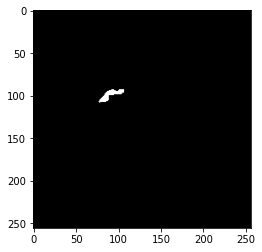

In [19]:
plt.imshow(cv2.imread(brain_df.mask_path[623]))

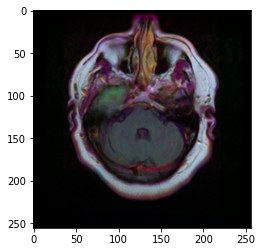

In [20]:
plt.imshow(cv2.imread(brain_df.image_path[623]))

In [21]:
cv2.imread(brain_df.mask_path[623]).max()
# esto lo que nos dice es que tiene tumor, ya que tiene un pixel con 255

255

In [22]:
cv2.imread(brain_df.mask_path[623]).min()

0

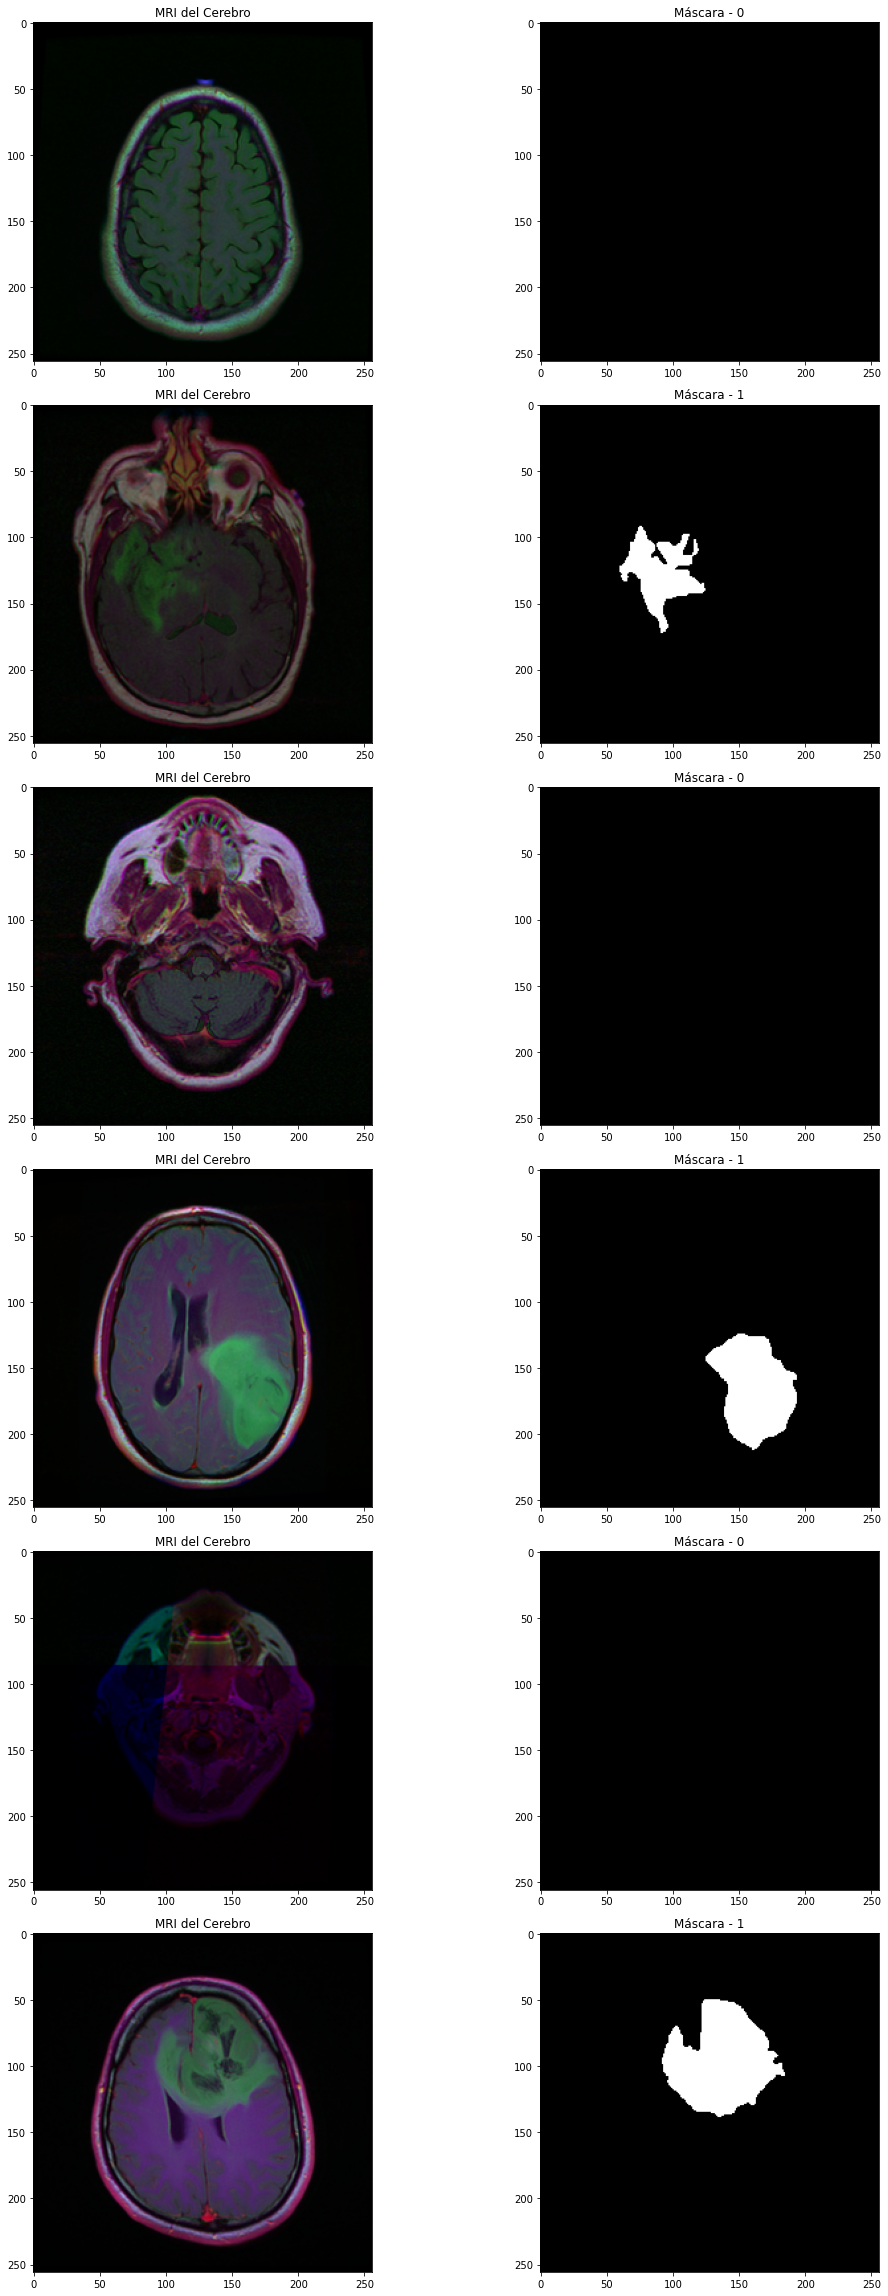

In [23]:
# Visualización básica Visualizaremos imágenes (MRI y Máscaras) en el dataset de forma separada
import random
fig, axs = plt.subplots(6,2, figsize=(16,32)) # 6 pacientes
count = 0 # 
for x in range(6): # cogemos 6 imagenes aleatorias. 
  i = random.randint(0, len(brain_df)) # Seleccionamos un índice aleatorio entre 0 y la longitud del dataset.
  axs[count][0].title.set_text("MRI del Cerebro") # Configuramos el título
  axs[count][0].imshow(cv2.imread(brain_df.image_path[i])) # Mostramos la MRI 
  axs[count][1].title.set_text("Máscara - " + str(brain_df['mask'][i])) # Colocámos el título en la máscara (0 o 1)
  axs[count][1].imshow(cv2.imread(brain_df.mask_path[i])) # Mostramos la máscara correspondiente 
  count += 1

fig.tight_layout() # esto lo que hace es ajustar las imagenes al tamaño de la pantalla.

MINI RETO #2: 
 - Representar aleatoriamente 12 (1) imágenes de  MRI seleccionadas aleatoriamente de entre los pacientes enfermos seguidas de (2) su correspondiente máscara, (3) tanto la imágen de la MRI junto con su máscara (de color rojo) una encima de la otra.

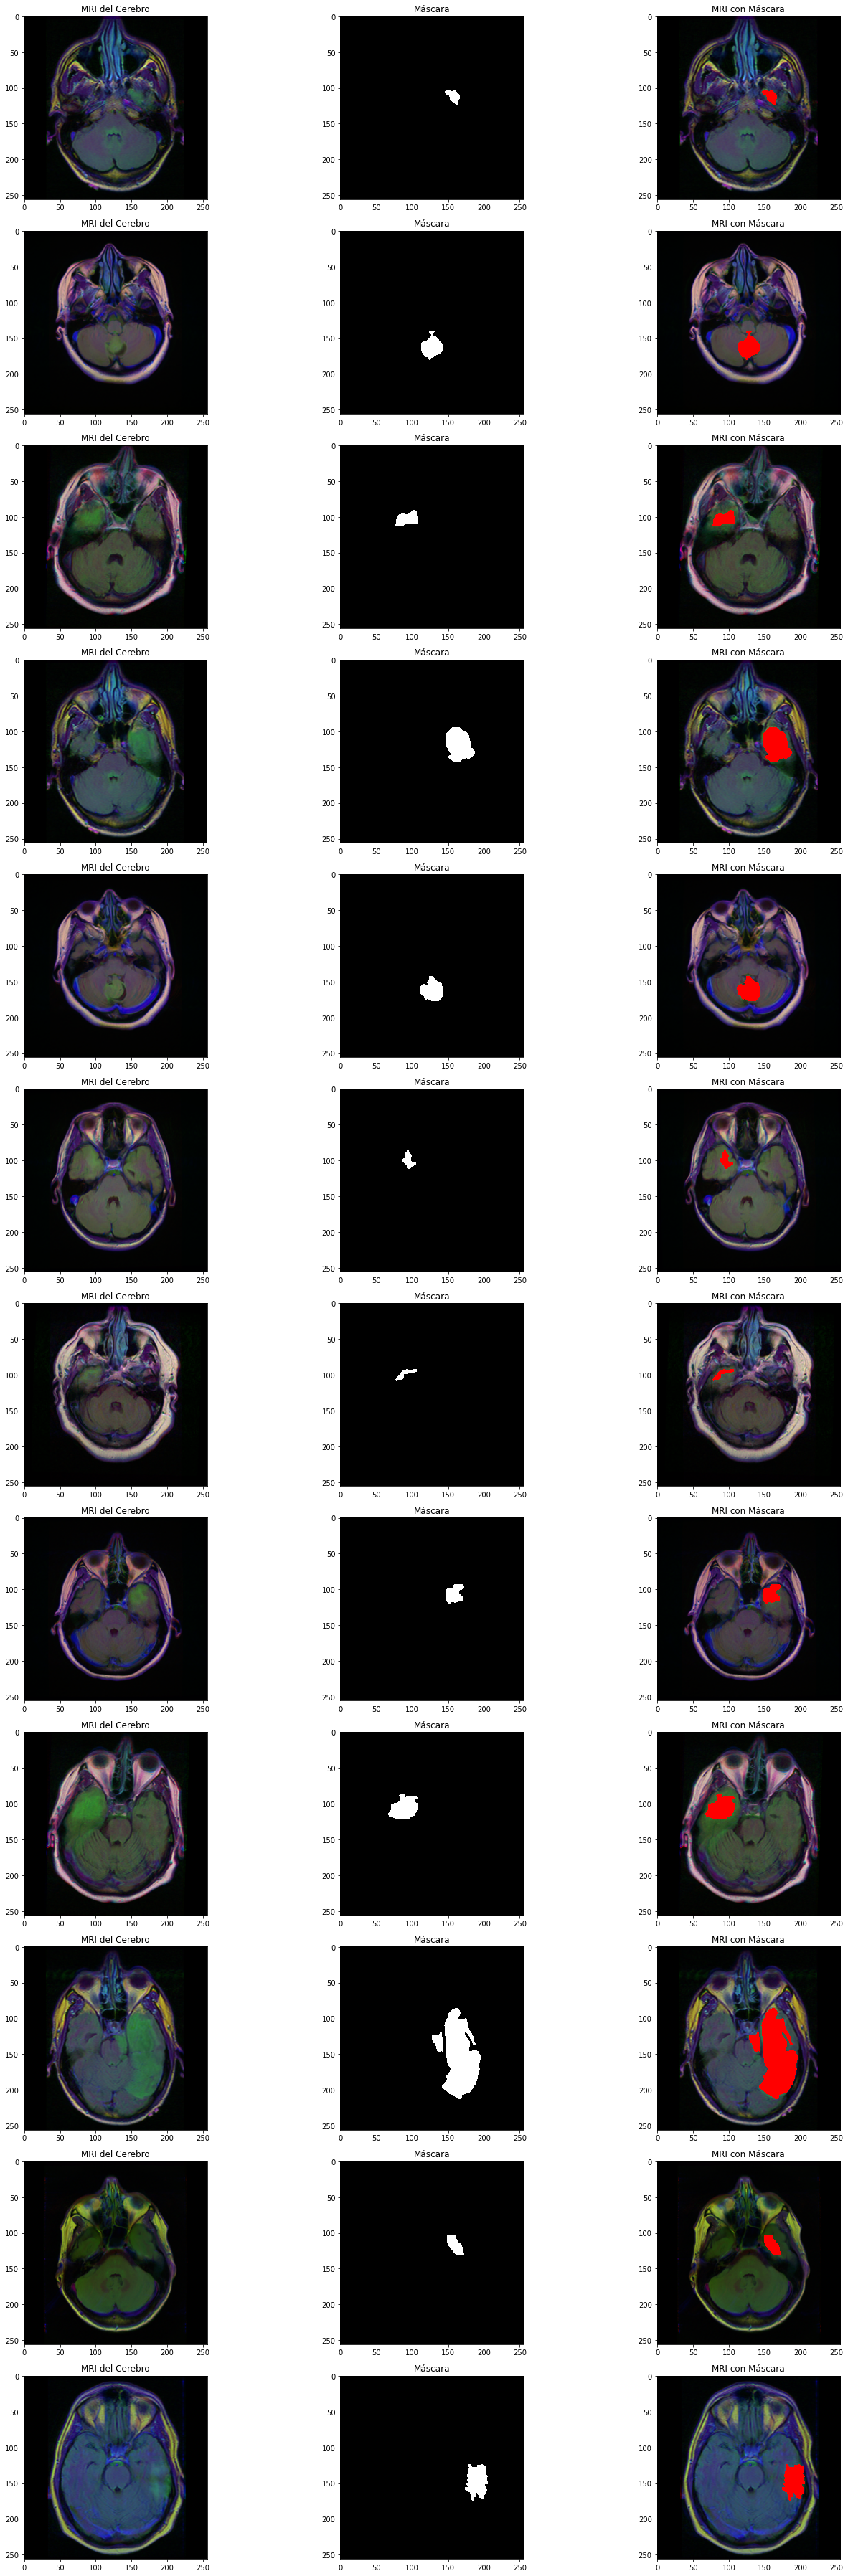

In [20]:
count = 0
fig, axs = plt.subplots(12, 3, figsize = (20, 50))
for i in range(len(brain_df)):
  if brain_df['mask'][i] ==1 and count <12: # si la imagen actual es 1, y además count es mas pequeño que 12 seguimos.
    img = io.imread(brain_df.image_path[i]) # cargo la imagen
    axs[count][0].title.set_text('MRI del Cerebro') # coloco el titulo
    axs[count][0].imshow(img)
# lo mismo con la mascara
    mask = io.imread(brain_df.mask_path[i])
    axs[count][1].title.set_text('Máscara')
    axs[count][1].imshow(mask, cmap = 'gray')

    
    img[mask == 255] = (255, 0, 0) # para las mascaras que tuvieran 255 la voy a reemplazar por un colo rrojo que es 255.0.0
    axs[count][2].title.set_text('MRI con Máscara')
    axs[count][2].imshow(img)
    count+=1

fig.tight_layout()
# hasta aquí la mascarra la tenemos, esto luego lo entrenaremos para predecir. 

# TAREA #4: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DE LAS REDES NEURONALES Y RESNETS CONVOLUCIONALES

![alt text](https://drive.google.com/uc?id=1Y9hpqFFGAIXtzVmHi49zCIYTERrff1K3)

- Feature Extraction and Convolutions: https://setosa.io/ev/image-kernels/
- CNN Visualization: https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html


![alt text](https://drive.google.com/uc?id=1nf65LNkurgUBqx8kU00FIgInMwHkJmR2)

- Link al paper de ResNets (Deep Residual Learning for Image Recognition): https://arxiv.org/pdf/1512.03385.pdf

MINI RETO #3: 
- ¿Cuál es el rendimiento de ResNet en el conjunto de datos ImageNet? 
- Explora otras arquitecturas de RNC como AlexNet y enumera su rendimiento en comparación con ResNet (se requiere investigación externa)

# TAREA # 5: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DEL APRENDIZAJE POR TRANSFERENCIA

![alt text](https://drive.google.com/uc?id=1Xj4c5U-cRQVnv38J_i-3J9IOHA0EG1nb)

![alt text](https://drive.google.com/uc?id=1fnfO27T6vlR0rWTPj41sm5fDwZXXo0Gs)

![alt text](https://drive.google.com/uc?id=1316MR8iufOwjiJD6vk9vIgwtepLNNCE0)

- Excelente recurso sobre transferencia de aprendizaje por Dipanjan Sarkar: https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a
- Artículo de Jason Brownlee: https://machinelearningmastery.com/transfer-learning-for-deep-learning/

MINI RETO #4: 
- Enumere los desafíos del aprendizaje por transferencia (se requiere investigación externa)

# TAREA # 6: ENTRENAR UN MODELO CLASIFICADOR PARA DETECTAR SI EXISTE TUMOR O NO

en esta ponemos en práctica las dos clases teóricas anteriores. 

In [24]:
# Eliminamos la columna de identificador del paciente
brain_df_train = brain_df.drop(columns = ['patient_id'])
brain_df_train.shape
# el identificador de paciente no nos vale para nada
# ya solo tenemos 3 columnas. 

(3929, 3)

In [25]:
# Convertir los datos en la columna de máscara a formato de string, para usar el modo categórico en flow_from_dataframe
# Verás este mensaje de error si comentad la siguiente línea de código:
# TypeError: If class_mode="categorical", y_col="mask" column values must be type string, list or tuple.
brain_df_train['mask'] = brain_df_train['mask'].apply(lambda x: str(x))
# la columna dejará de ser de numeros enteros a ser de sting. 

In [26]:
brain_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   mask        3929 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


In [27]:
# Dividir los datos en entrenamiento y testing

from sklearn.model_selection import train_test_split

train, test = train_test_split(brain_df_train, test_size = 0.15)

In [28]:
# Creamos el generador de imágenes
from keras_preprocessing.image import ImageDataGenerator

# Creamos un generador de datos que escale los datos de 0 a 1 y haga una división de validación de 0,15
datagen = ImageDataGenerator(rescale=1./255., validation_split = 0.15)
# todos los pixeles serán divididos entre 255
# entrenamiento y validation

In [29]:
train_generator=datagen.flow_from_dataframe( # aqui generamos el modelo de entrenamiento
dataframe=train, # toma el dataframe train
directory= './', # desde nos encontramos
x_col='image_path', # tomamos el image path
y_col='mask', # aqui cogemos la mascara
subset="training", # estamos haciendo el de entrenamiento
batch_size=16, # el tamaño de lo losstes será de 16
shuffle=True, # vamos a barajar para que el modelo no se lo aprenda.
class_mode="categorical", # el algoritmo es categorico
target_size=(256,256)) # el tamaño de la imagen sera este

# lo mismo hacemos debajo con el de validación
valid_generator=datagen.flow_from_dataframe( # aqui generamos el de validación. 
dataframe=train,
directory= './',
x_col='image_path',
y_col='mask',
subset="validation",
batch_size=16,
shuffle=True,
class_mode="categorical",
target_size=(256,256))

# Creamos un generador de datos para imágenes de prueba
# aqui esta el de test que es el 15 por ciento, y hacemos lo mismo que arriba 
test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=test,
directory= './',
x_col='image_path',
y_col='mask',
batch_size=16,
shuffle=False, # no hace falta hacerlas aleatorias. 
class_mode='categorical',
target_size=(256,256))



Found 2839 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.
Found 590 validated image filenames belonging to 2 classes.


In [30]:
# este es el momento del aprendizaje por transferencia. 
# Obtenemos el modelo base de ResNet50 
basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = Input(shape=(256, 256, 3)))
# esplicacion
    # primero le pido el modelo ResNet50. es una red que ya está entrenada. con millones de imagenes. es capaz de detectar mucyas caracteristicas.
    # no descargamos imagenet
    # include top false, no queremos incluir la capa densa al final, queremos incluir la nuestras. 
    # input tensor especificamos la capa de entrada tiene que estar preparada con esa medida de 256 de alto   256   de ancho  y 3 de profundidad a color

94781440/94765736 [==============================] - 0s 0us/step


In [31]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

la capa final es la 5, tiene 23 millones de parametros.
ya hemos descargado el modelo base entrenado. 
esto ya no lo tenemos que volver a entrenar. lo que si vamos a entrenar la capa final que es lo que vamos a hacer a continuación.
lo hemos dejado en imagenes 8 x 8 y 2048 caractarístidas. 

In [ ]:
# Congelamos los pesos del modelo

for layer in basemodel.layers:
  layers.trainable = False

In [29]:
# Agregamos una cabecera de clasificación al modelo base

headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel) # reducidimos a 4,4
headmodel = Flatten(name= 'flatten')(headmodel) # los vamos a aplanar. tendremos 4 x4 y 2048 de profunidad
headmodel = Dense(256, activation = "relu")(headmodel) # añadimos una capa densa de 256
headmodel = Dropout(0.3)(headmodel) # droput del 30 por ciento, es para generalizar mejor. el 30 por ciento de las neuronas no se activarán
headmodel = Dense(256, activation = "relu")(headmodel) # segunda capa densa
headmodel = Dropout(0.3)(headmodel) # con otro dropout
#headmodel = Dense(256, activation = "relu")(headmodel)
#headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(2, activation = 'softmax')(headmodel) # ultima capa densa con solo dos neuronas, con una probabilidad aplicamos softmax.

model = Model(inputs = basemodel.input, outputs = headmodel)

In [30]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [31]:
# Compilamos el modelo

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [32]:
# Utilizamos la parada temprana para salir del entrenamiento si la pérdida en la validación no disminuye incluso después de ciertas épocas (paciencia)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
# para el entrenamiento cuando no mejora

# Guardamos el mejor modelo con la menor pérdida de validación
checkpointer = ModelCheckpoint(filepath="classifier-resnet-weights.hdf5", verbose=1, save_best_only=True)

In [33]:
# llega la fase de entrenamiento
# 
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 16, epochs = 1, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping])

177/177 [==============================] - ETA: 0s - loss: 0.8964 - accuracy: 0.7085
Epoch 1: val_loss improved from inf to 2.29059, saving model to classifier-resnet-weights.hdf5
177/177 [==============================] - 826s 5s/step - loss: 0.8964 - accuracy: 0.7085 - val_loss: 2.2906 - val_accuracy: 0.3508


In [34]:
# Guardamos la arquitectura del modelo en un archivo json para uso futuro

model_json = model.to_json()
with open("classifier-resnet-model.json","w") as json_file:
  json_file.write(model_json)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


MINI RETO #5: 
- Cambia la arquitectura de la red agregando capas, neuronas o Dropouts más / menos densos.
- Imprime el resumen del modelo y compara el número total de parámetros entrenables entre el modelo original y el nuevo

In [ ]:
headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(2, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [ ]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

# TAREA # 7: EVALUA EL RENDIMIENTO DEL MODELO ENTRENADO

In [32]:
# Cargamos el modelo preentrenado (en lugar de entrenar el modelo durante más de 1 hora)
with open('resnet-50-MRI.json', 'r') as json_file: # ha elegido el mejor modelo que tiene, no el que habíamos guardado. 
    json_savedModel= json_file.read()
# Cargar el modelo  
model = tf.keras.models.model_from_json(json_savedModel) # lo carga en esta instancia de keras. 
model.load_weights('weights.hdf5') # aqui le carga los pesos adecuados. 
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [33]:
# Hacemos la predicción

test_predict = model.predict(test_generator, steps = test_generator.n // 16, verbose =1)

36/36 [==============================] - 137s 4s/step


In [34]:
test_predict.shape

(576, 2)

In [35]:
test_predict # primera columna la probabilidad de que no la seguna que si
# la columna 1 mas la columna 2 siempre suma 1

array([[9.99998689e-01, 1.36515803e-06],
       [1.21869214e-01, 8.78130794e-01],
       [1.00000000e+00, 1.14745151e-10],
       ...,
       [5.68094663e-04, 9.99431908e-01],
       [9.99993086e-01, 6.95589188e-06],
       [2.91378796e-02, 9.70862150e-01]], dtype=float32)

In [36]:
# Obtenemos la clase predicha a partir del modelo
predict = []

for i in test_predict:
  predict.append(str(np.argmax(i))) # nos quedamo con la probabilidad maxima de cada fila. también podríamos configurar para que fuera positivo si superara otro rango.
  # es decir le prodemos fijar un umbral. 

predict = np.asarray(predict)

In [37]:
predict

array(['0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1',
       '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1',
       '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0',
       '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1',
       '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0',
       '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1',
       '0', '0', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1',
       '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1

In [39]:
# Dado que usamos el generador de prueba, se limita el número de imágenes a leer (predecir), debido al tamaño del lote
original = np.asarray(test['mask'])[:len(predict)] # me quedo desde la primera hasta la longitud de la prediccion
len(original)

576

In [40]:
# Obtenemos la tasa de acierto del modelo
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, predict)
accuracy

0.9878472222222222

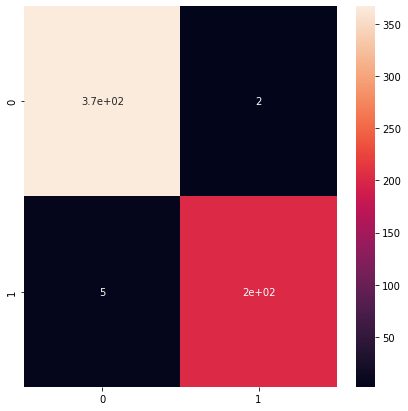

In [41]:
# Representamos la matriz de confusión
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(original, predict)
plt.figure(figsize = (7,7))
sns.heatmap(cm, annot=True)

MINI RETO #6: 
- Imprime el informe de clasificación y comenta sobre los resultados de precisión, recuperación y F1-Score

In [43]:
from sklearn.metrics import classification_report

report = classification_report(original, predict, labels = [0,1])
print(report)
# f1-score es la media entre precision y recall

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       369
           1       0.99      0.98      0.98       207

   micro avg       0.99      0.99      0.99       576
   macro avg       0.99      0.99      0.99       576
weighted avg       0.99      0.99      0.99       576



/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



# TAREA # 8: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DE LOS MODELOS RESUNET

![alt text](https://drive.google.com/uc?id=1lspkqnFswwigkI9w1xR_GIyDOBtJztY4)

![alt text](https://drive.google.com/uc?id=1dEqVh2vxL1KBvA2gIM9XgBySDW31m34z)

![alt text](https://drive.google.com/uc?id=1zOR3-sqfZq3bbisvjtAaR7q0v8UGCFKW)

![alt text](https://drive.google.com/uc?id=1XTes0Qtr-wu9NLSIfg9MfE83TrKmFxEH)

![alt text](https://drive.google.com/uc?id=136tXXjGs4NCn6_mHzr7JRzKr_8ro-tBy)

# TAREA # 9: CONSTRUIR UN MODELO DE SEGMENTACIÓN PARA LOCALIZAR EL TUMOR

In [6]:
# Obtenemos el dataframe que contiene las resonancias magnéticas que tienen máscaras asociadas.
brain_df_mask = brain_df[brain_df['mask'] == 1]
brain_df_mask.shape

(1373, 4)

In [7]:
# Dividir los datos en datos de prueba y de tren

from sklearn.model_selection import train_test_split

X_train, X_val = train_test_split(brain_df_mask, test_size=0.15)
X_test, X_val = train_test_split(X_val, test_size=0.5)

In [8]:
# Crear una lista separada para imageId, classId para pasar al generador

train_ids = list(X_train.image_path)
train_mask = list(X_train.mask_path)

val_ids = list(X_val.image_path)
val_mask= list(X_val.mask_path)

In [9]:
# El archivo de utilidades contiene el código para la función de pérdida personalizada y el generador de datos personalizados
from utilities import DataGenerator # este utilities lo descarga de la carpeta del curso. 

# Creamos los generadores de imágenes

training_generator = DataGenerator(train_ids,train_mask)
validation_generator = DataGenerator(val_ids,val_mask)

In [10]:
def resblock(X, f):
  

  # Hacemos la copia de la entrada. lo priemro que hacemos es una copia de la entrada. 
  X_copy = X

  # Ruta principal
  # Más acerca de he_normal: https://medium.com/@prateekvishnu/xavier-and-he-normal-he-et-al-initialization-8e3d7a087528

  X = Conv2D(f, kernel_size = (1,1) ,strides = (1,1),kernel_initializer ='he_normal')(X)
  X = BatchNormalization()(X)
  X = Activation('relu')(X) 

  X = Conv2D(f, kernel_size = (3,3), strides =(1,1), padding = 'same', kernel_initializer ='he_normal')(X)
  X = BatchNormalization()(X)

  # Ruta corta
  # Más sobre esto en: https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33

  X_copy = Conv2D(f, kernel_size = (1,1), strides =(1,1), kernel_initializer ='he_normal')(X_copy)
  X_copy = BatchNormalization()(X_copy)

    # Agregar la salida de la ruta principal y la ruta corta juntas

  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [11]:
# Función para escalar y concatenar los valores pasados
def upsample_concat(x, skip):
  x = UpSampling2D((2,2))(x)
  merge = Concatenate()([x, skip])

  return merge

In [12]:
input_shape = (256,256,3)

# Forma del tensor de entrada
X_input = Input(input_shape)

# Fase 1
conv1_in = Conv2D(16,3,activation= 'relu', padding = 'same', kernel_initializer ='he_normal')(X_input)
conv1_in = BatchNormalization()(conv1_in)
conv1_in = Conv2D(16,3,activation= 'relu', padding = 'same', kernel_initializer ='he_normal')(conv1_in)
conv1_in = BatchNormalization()(conv1_in)
pool_1 = MaxPool2D(pool_size = (2,2))(conv1_in)

# Fase 2
conv2_in = resblock(pool_1, 32)
pool_2 = MaxPool2D(pool_size = (2,2))(conv2_in)

# Fase 3
conv3_in = resblock(pool_2, 64)
pool_3 = MaxPool2D(pool_size = (2,2))(conv3_in)

# Fase 4
conv4_in = resblock(pool_3, 128)
pool_4 = MaxPool2D(pool_size = (2,2))(conv4_in)

# Fase 5 (Cuello de Botella)
conv5_in = resblock(pool_4, 256)

# Fase de Escalada 1
up_1 = upsample_concat(conv5_in, conv4_in)
up_1 = resblock(up_1, 128)

# Fase de Escalada 2
up_2 = upsample_concat(up_1, conv3_in)
up_2 = resblock(up_2, 64)

# Fase de Escalada 3
up_3 = upsample_concat(up_2, conv2_in)
up_3 = resblock(up_3, 32)

# Fase de Escalada 4
up_4 = upsample_concat(up_3, conv1_in)
up_4 = resblock(up_4, 16)

# Salida Final
output = Conv2D(1, (1,1), padding = "same", activation = "sigmoid")(up_4)

model_seg = Model(inputs = X_input, outputs = output )


MINI RETO #7: 
- Imprime el resumen del modelo de segmentación y enumera el número total de parámetros entrenables

In [13]:
model_seg.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

# TAREA # 10: ENTRENAR UN MODELO DE RESUNET DE SEGMENTACIÓN PARA LOCALIZAR EL TUMOR

## Función de pérdida:
 
Necesitamos una función de pérdida personalizada para entrenar este ResUNet. Por lo tanto, hemos utilizado la función de pérdida tal como se ve en https://github.com/nabsabraham/focal-tversky-unet/blob/master/losses.py


@article{focal-unet,
  title={A novel Focal Tversky loss function with improved Attention U-Net for lesion segmentation},
  author={Abraham, Nabila and Khan, Naimul Mefraz},
  journal={arXiv preprint arXiv:1810.07842},
  year={2018}
}

In [14]:
# El archivo de utilidades contiene el código para la función de pérdida personalizada y el generador de datos personalizados

from utilities import focal_tversky, tversky_loss, tversky

In [15]:
# Compilamos el modelo
adam = tf.keras.optimizers.Adam(lr = 0.05, epsilon = 0.1)
model_seg.compile(optimizer = adam, loss = focal_tversky, metrics = [tversky])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
# Usamos la parada temprana para salir del entrenamiento si la pérdida de validación no disminuye incluso después de ciertas épocas (paciencia)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# Guardamos el mejor modelo con menor pérdida de validación
checkpointer = ModelCheckpoint(filepath="ResUNet-weights.hdf5", verbose=1, save_best_only=True)

In [17]:
history = model_seg.fit(training_generator , epochs = 1, validation_data = validation_generator, callbacks = [checkpointer, earlystopping])

72/72 [==============================] - ETA: 0s - loss: 0.8574 - tversky: 0.1850
Epoch 1: val_loss improved from inf to 0.84544, saving model to ResUNet-weights.hdf5
72/72 [==============================] - 684s 9s/step - loss: 0.8574 - tversky: 0.1850 - val_loss: 0.8454 - val_tversky: 0.2005


In [ ]:
# Guardamos la arquitectura del modelo en un archivo json para uso futuro

model_json = model_seg.to_json()
with open("ResUNet-model.json","w") as json_file:
  json_file.write(model_json)

# TAREA # 11: EVALUAR EL RENDIMIENTO DEL MODELO DE RESUNET DE SEGMENTACIÓN ENTRENADA

In [ ]:
from utilities import focal_tversky, tversky_loss, tversky

with open('ResUNet-MRI.json', 'r') as json_file:
    json_savedModel= json_file.read()

# cargar la arquitectura del modelo
model_seg = tf.keras.models.model_from_json(json_savedModel)
model_seg.load_weights('weights_seg.hdf5')
adam = tf.keras.optimizers.Adam(lr = 0.05, epsilon = 0.1)
model_seg.compile(optimizer = adam, loss = focal_tversky, metrics = [tversky])

In [ ]:
# El archivo de utilidades contiene el código para la función de pérdida personalizada y el generador de datos personalizados
from utilities import prediction

# Hacemos la predicción
image_id, mask, has_mask = prediction(test, model, model_seg)

In [ ]:
# Creamos el dataframe para el resultado
df_pred = pd.DataFrame({'image_path': image_id,'predicted_mask': mask,'has_mask': has_mask})
df_pred

image_path  ... has_mask
0    TCGA_DU_A5TR_19970726/TCGA_DU_A5TR_19970726_12...  ...        1
1    TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_5.tif  ...        0
2    TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_24...  ...        1
3    TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_20...  ...        0
4    TCGA_FG_7634_20000128/TCGA_FG_7634_20000128_24...  ...        1
..                                                 ...  ...      ...
585  TCGA_DU_5849_19950405/TCGA_DU_5849_19950405_34...  ...        0
586  TCGA_FG_7637_20000922/TCGA_FG_7637_20000922_40...  ...        0
587  TCGA_HT_7860_19960513/TCGA_HT_7860_19960513_6.tif  ...        0
588  TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_49...  ...        1
589  TCGA_HT_7605_19950916/TCGA_HT_7605_19950916_11...  ...        0

[590 rows x 3 columns]

In [ ]:
# Fusionar el data frame que contiene los resultados previstos con los datos de prueba originales.
df_pred = test.merge(df_pred, on = 'image_path')
df_pred.head()

image_path  ... has_mask
0  TCGA_DU_A5TR_19970726/TCGA_DU_A5TR_19970726_12...  ...        1
1  TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_5.tif  ...        0
2  TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_24...  ...        1
3  TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_20...  ...        0
4  TCGA_FG_7634_20000128/TCGA_FG_7634_20000128_24...  ...        1

[5 rows x 5 columns]

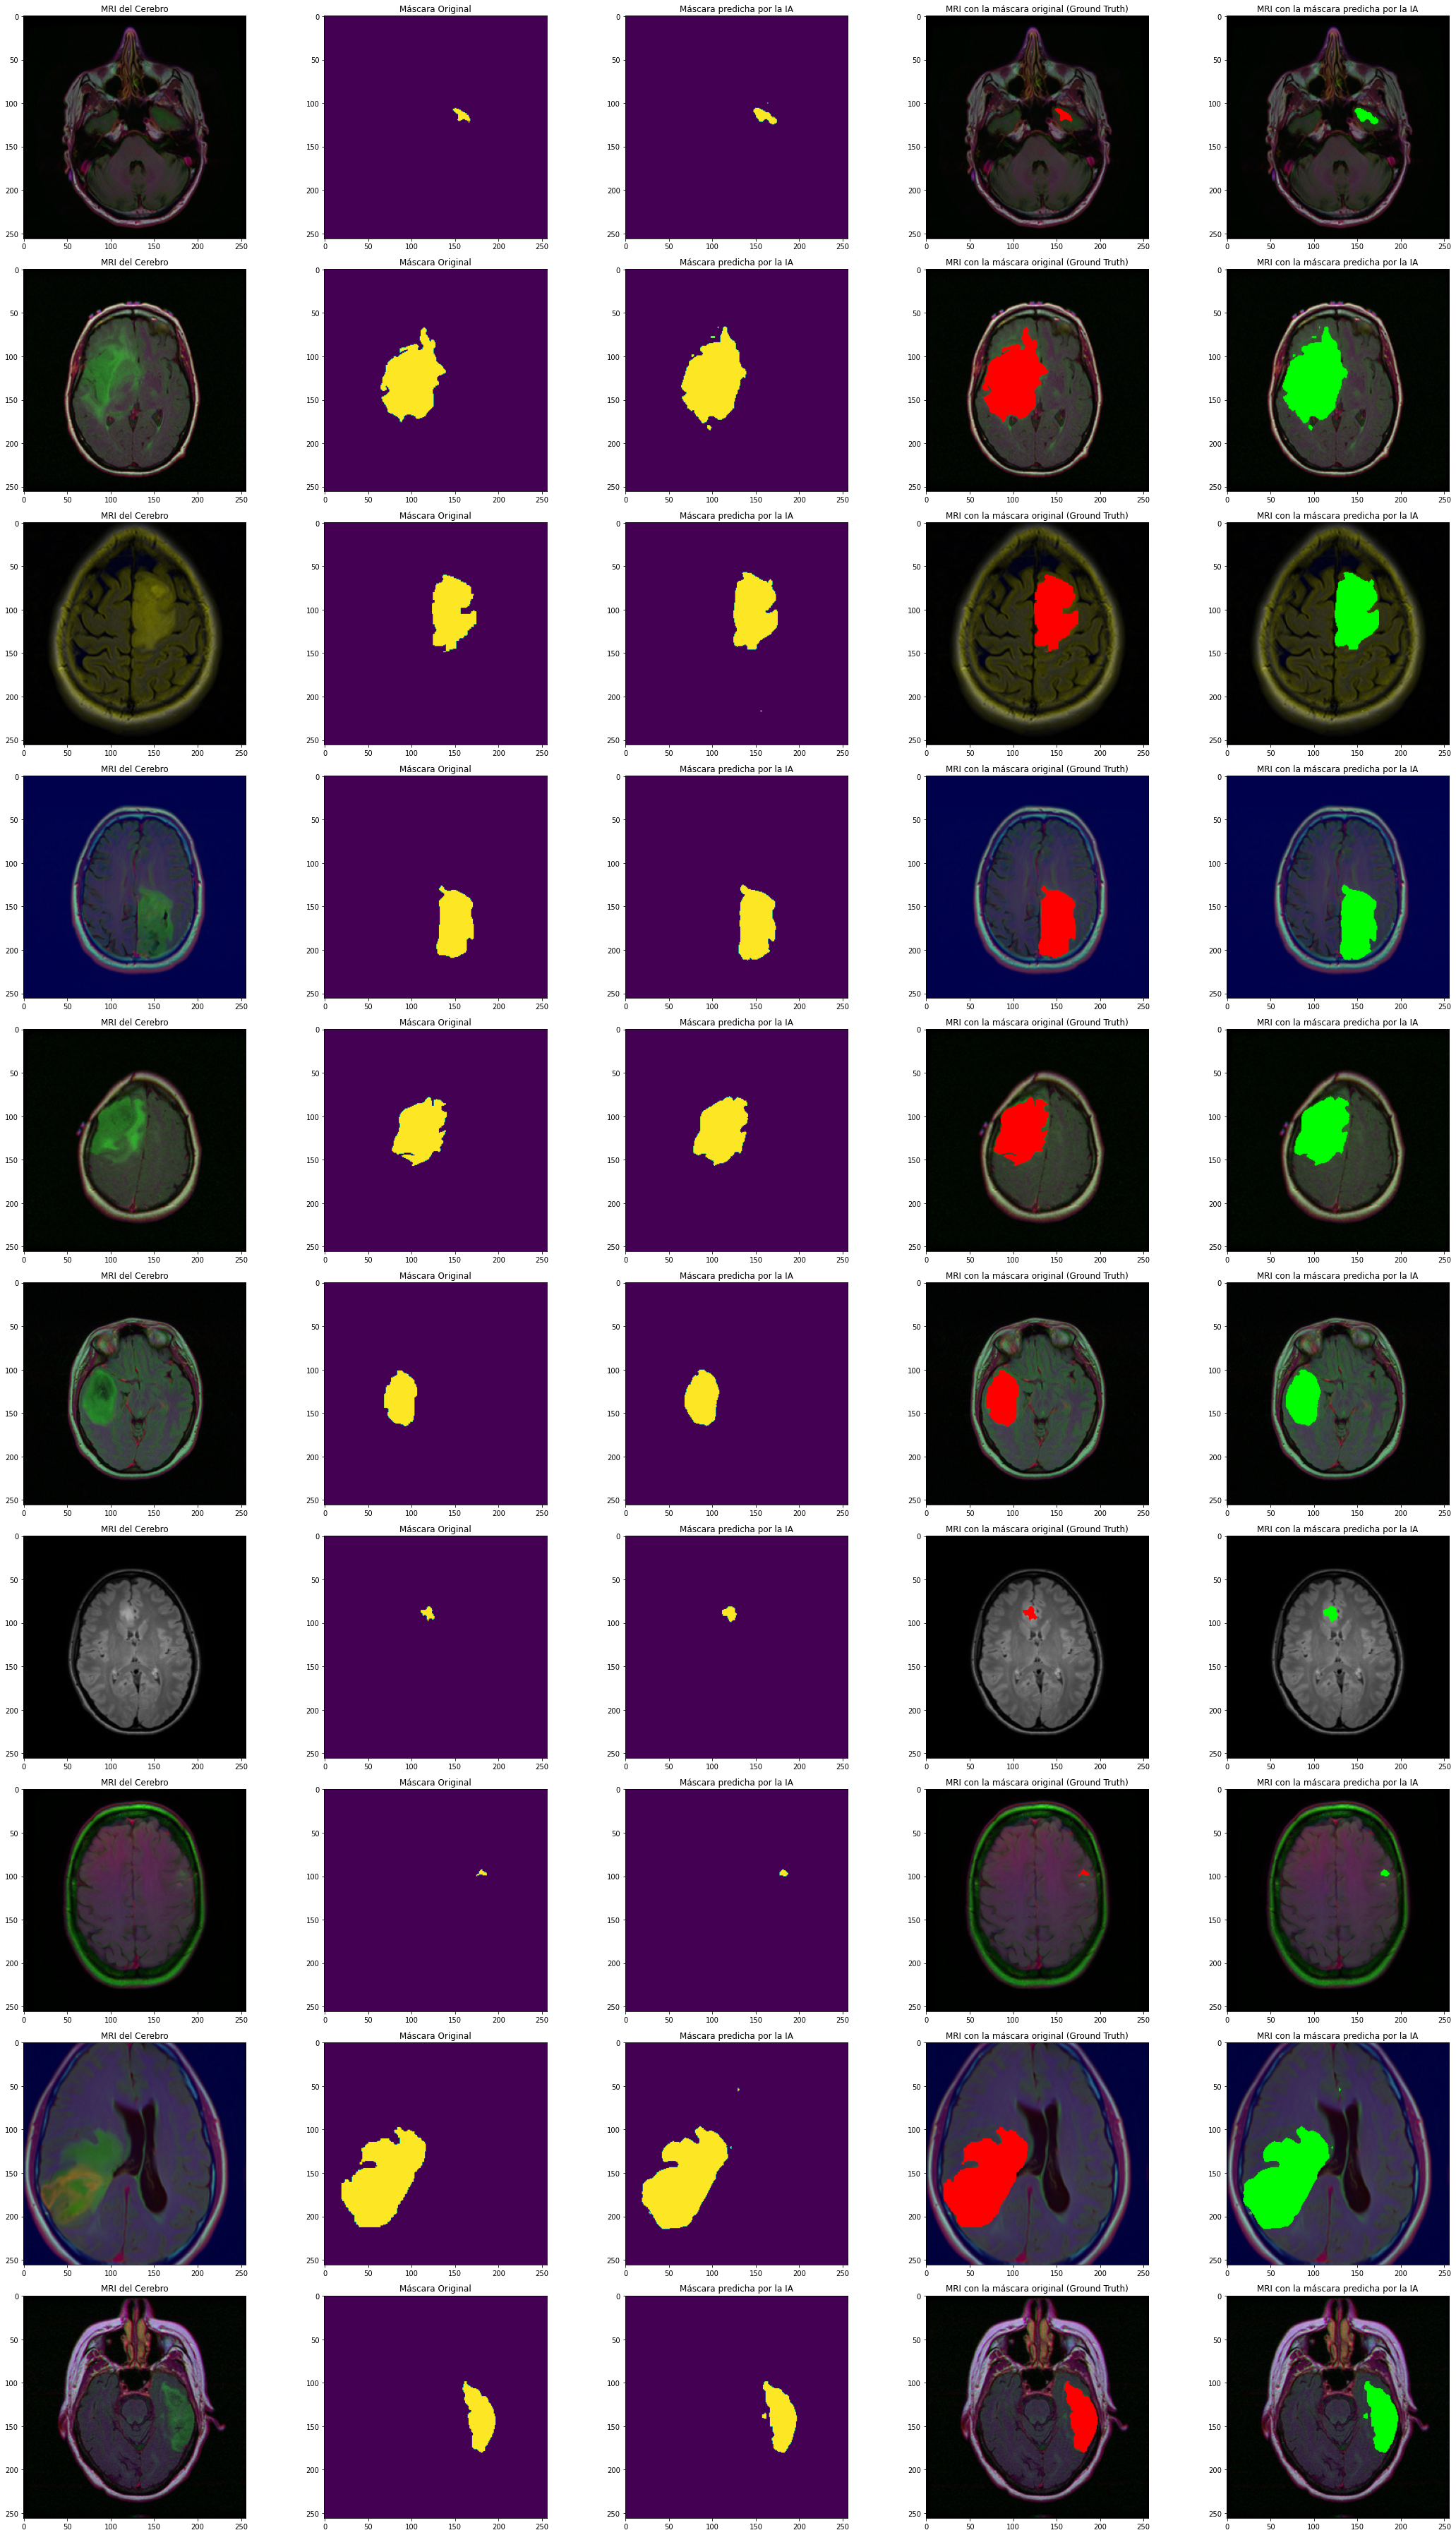

In [ ]:
count = 0 
fig, axs = plt.subplots(10, 5, figsize=(30, 50))
for i in range(len(df_pred)):
  if df_pred['has_mask'][i] == 1 and count < 10:
    # leer las imágenes y convertirlas a formato RGB
    img = io.imread(df_pred.image_path[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[count][0].title.set_text("MRI del Cerebro")
    axs[count][0].imshow(img)

    # Obtenemos la máscara para la imagen
    mask = io.imread(df_pred.mask_path[i])
    axs[count][1].title.set_text("Máscara Original")
    axs[count][1].imshow(mask)

    # Obtenemos la máscara de predicción para dicha imagen
    predicted_mask = np.asarray(df_pred.predicted_mask[i])[0].squeeze().round()
    axs[count][2].title.set_text("Máscara predicha por la IA")
    axs[count][2].imshow(predicted_mask)
    
    # Aplicamos la máscara a la imagen 'mask==255'
    img[mask == 255] = (255, 0, 0)
    axs[count][3].title.set_text("MRI con la máscara original (Ground Truth)")
    axs[count][3].imshow(img)

    img_ = io.imread(df_pred.image_path[i])
    img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
    img_[predicted_mask == 1] = (0, 255, 0)
    axs[count][4].title.set_text("MRI con la máscara predicha por la IA")
    axs[count][4].imshow(img_)
    count += 1

fig.tight_layout()

MINI RETO #8:
- Representa 30 imágenes junto con su máscara correspondiente
- Verifica visualmente que las predicciones del modelo tengan sentido

# ¡EXCELENTE TRABAJO! AHORA SABES CÓMO APLICAR LA IA PARA DETECTAR Y LOCALIZAR TUMORES CEREBRALES. ESTE ES UN GRAN LOGRO EN SALUD.

# SOLUCIONES A LOS MINI RETOS

MINI RETO #1

In [ ]:
# Obtener el número de imágenes con máscara
brain_df['mask'].value_counts()

MINI CHALLENGE #2

In [ ]:
# Visualización avanzada: visualiza las imágenes por resonancia magnética junto con su máscara en una imagen
count = 0 
fig, axs = plt.subplots(12,3, figsize=(20,50))
for i in range(len(brain_df)):
  if brain_df['mask'][i] == 1 and count < 12:
  # Leemos las imágenes 
    img = io.imread(brain_df.image_path[i])
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[count][0].title.set_text("Brain MRI")
    axs[count][0].imshow(img)

    # Obtenemos la máscara para la imagen
    mask = io.imread(brain_df.mask_path[i])
    axs[count][1].title.set_text("Mask")
    axs[count][1].imshow(mask, cmap = 'gray')
    
    # Reemplazamos los valores en la imagen con color rojo (255,0,0) si algún píxel de máscara en la máscara era = 255
    img[mask == 255] = (255,0,0)    
    axs[count][2].title.set_text("MRI with Mask")
    axs[count][2].imshow(img)
    count += 1

fig.tight_layout()

MINI RETO #3:

- Un conjunto de estas redes residuales alcanza un error del 3,57%
en el conjunto de test de ImageNet.
- Solución (buen artículo de Siddharth Das): https://medium.com/analytics-vidhya/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5

MINI RETO #4:
- La transferencia negativa ocurre cuando el aprendizaje por transferencia afecta negativamente al modelo. Esto ocurre cuando las características de las tareas nuevas y antiguas no están relacionadas.
- Límites de transferencia: medir la cantidad de conocimiento transferido es crucial para garantizar la calidad y solidez del modelo.

MINI RETO #5:

In [ ]:
# Agregar una cabecera de clasificación al modelo base

headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(2, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [ ]:
Total parameters (original model) = 25,685,634
Total parameters (New model with added dense and dropout layers) = 25,751,426

MINI RETO #6:

In [ ]:

from sklearn.metrics import classification_report

report = classification_report(original,predict, labels = [0,1])
print(report)

MINI RETO #7:


- Total de parámetros: 1,210,513

MINI RETO #8:

In [ ]:
count = 0 
fig, axs = plt.subplots(30, 5, figsize=(60, 100))
for i in range(len(df_pred)):
  if df_pred['has_mask'][i] == 1 and count < 30: